# Interferometric intensity constraint
 - This tutorial explains different intensity update constraint. 
 - A reflection dataset measusred with a USAF resolution target at 700 nm is used to demonstrate. The data is available on figshare.com (open access): search for ptyLab on figshare.com, download the file 'USAF_speckle_bin4.hdf5'
 - The reconstruction results are published in the PhD thesis "Computational Depth-resolved Imaging and Metrology" by Mengqi Du.
 - Check out general tutorials for CPM (conventional ptychographic microscopy) before diving into this one.

In [1]:
%matplotlib notebook
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import h5py

In [2]:
# import the fracPy module
import fracPy
from fracPy import ExperimentalData
from fracPy import Reconstruction
from fracPy import Monitor
from fracPy import Params
from fracPy import Engines
from fracPy.utils.utils import posit

In [3]:
## Download the data ('USAF_speckle_bin4.hdf5') from figshare.com, 
# set the fileFolder variable below to where you store the downloaded data

# set your data folder as fileFolder 
fileFolder = Path(r"D:\Du\InternalWorkshop\Scripts\NIR90reflection\ComparisonUSAF")

fileName = "USAF_speckle_bin4.hdf5"
filePath = Path.joinpath(fileFolder,fileName)

In [4]:
# initialize the ExperimentalData class
experimentalData = ExperimentalData(filePath, operationMode='CPM')
experimentalData.entrancePupilDiameter = 0.4e-3  # initial estimate of beam size
backgroundOffset = 20  # background noise estimate
experimentalData.ptychogram = posit(experimentalData.ptychogram-backgroundOffset)  # subtract the background level
experimentalData.showPtychogram()

Maximum count in ptychogram is 16202


In [5]:
## initialize the Reconstruction class 
reconstruction = Reconstruction(experimentalData)
# reconstruction.No = 2**11   # set the object pixel numb

# set initial guesses for the probe and the object
reconstruction.initialProbe = 'circ'
reconstruction.initialObject = 'ones'
# initialize probe and object and related params
reconstruction.initializeObjectProbe()

# customize initial probe quadratic phase
reconstruction.probe = reconstruction.probe*np.exp(1.j*2*np.pi/reconstruction.wavelength *
                                             (reconstruction.Xp**2+reconstruction.Yp**2)/(3*6e-3))

In [6]:
## Initialise the monitor class
monitor = Monitor()
# Set monitor properties
monitor.figureUpdateFrequency = 1  # set the frequency of the figure updates
monitor.objectPlot = 'complex'  # the form of the object plot: complex, abs, or angle
monitor.verboseLevel = 'high'  # high: plot two figures, low: plot only one figure
monitor.probeZoom = 1  # control probe plot FoV
monitor.objectZoom = 2   # control object plot FoV
monitor.objectContrast = 0.8   # control object plot contrast, [0,1], smaller number, higher contrast
monitor.probeContrast = 0.5   # control probe plot contrast, [0,1], smaller number, higher contrast

In [7]:
## Initialise Params class
params = Params()
## switches
params.gpuSwitch = True
params.positionOrder = 'random'  # 'sequential' or 'random'
params.propagatorType = 'Fraunhofer'  # Fraunhofer Fresnel ASP scaledASP polychromeASP scaledPolychromeASP
params.probePowerCorrectionSwitch = True    # fix the power of the probe to the maximum of the ptychogram
params.comStabilizationSwitch = True   # fix the center-of-mass of the probe in the center of the probe frame
params.backgroundModeSwitch = True   # estimate an incoherent background 

Below we show reconstructions with different intensityConstraints, 'standard' versus 'interferometric'

In [8]:
# We first use standard intensityConstraint
params.intensityConstraint = 'standard'  

d:\du\workshop\fracpy\fracPy\Engines\BaseEngine.py:293: UserWarning: fftshiftSwitch set to false, this may lead to reduced performance
  warnings.warn('fftshiftSwitch set to false, this may lead to reduced performance')


<IPython.core.display.Javascript object>


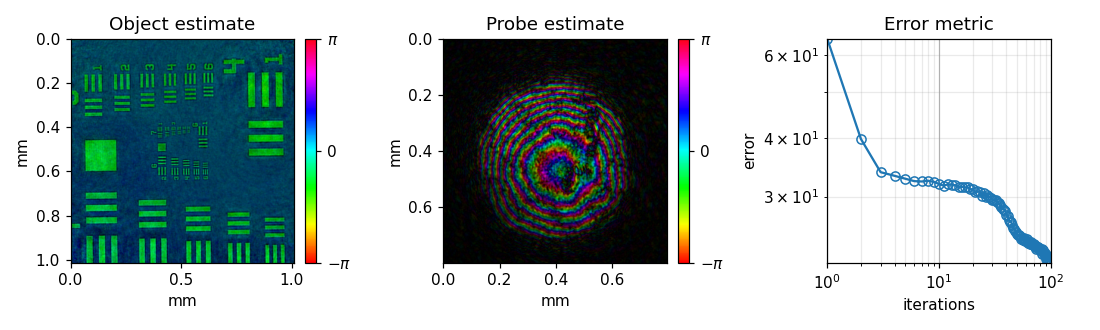

<IPython.core.display.Javascript object>


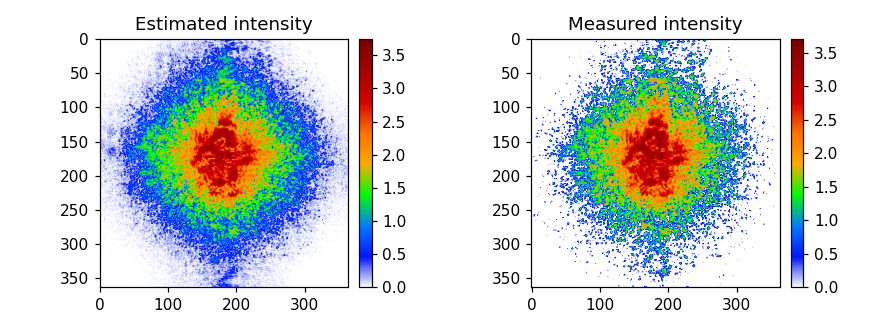

                                                                                                                       
iteration: 0                                                                                                           
error: 65.0                                                                                                            
estimated linear overlap: 74.0 %                                                                                       
estimated area overlap: 55.0 %                                                                                         
                                                                                                                       
iteration: 1                                                                                                           
error: 39.8                                                                                                            
estimated linear overlap: 73.9 %        

estimated linear overlap: 74.9 %                                                                                       
estimated area overlap: 66.6 %                                                                                         
                                                                                                                       
iteration: 14                                                                                                          
error: 31.4                                                                                                            
estimated linear overlap: 74.9 %                                                                                       
estimated area overlap: 67.1 %                                                                                         
                                                                                                                       
iteration: 15                           

iteration: 27                                                                                                          
error: 29.9                                                                                                            
estimated linear overlap: 76.2 %                                                                                       
estimated area overlap: 74.5 %                                                                                         
                                                                                                                       
iteration: 28                                                                                                          
error: 29.8                                                                                                            
estimated linear overlap: 76.2 %                                                                                       
estimated area overlap: 75.1 %          

estimated area overlap: 78.7 %                                                                                         
                                                                                                                       
iteration: 41                                                                                                          
error: 26.8                                                                                                            
estimated linear overlap: 76.9 %                                                                                       
estimated area overlap: 79.0 %                                                                                         
                                                                                                                       
iteration: 42                                                                                                          
error: 26.5                             

error: 24.5                                                                                                            
estimated linear overlap: 76.3 %                                                                                       
estimated area overlap: 78.0 %                                                                                         
                                                                                                                       
iteration: 55                                                                                                          
error: 24.2                                                                                                            
estimated linear overlap: 76.3 %                                                                                       
estimated area overlap: 78.0 %                                                                                         
                                        

                                                                                                                       
iteration: 68                                                                                                          
error: 23.7                                                                                                            
estimated linear overlap: 75.9 %                                                                                       
estimated area overlap: 78.0 %                                                                                         
                                                                                                                       
iteration: 69                                                                                                          
error: 23.6                                                                                                            
estimated linear overlap: 75.9 %        

estimated linear overlap: 75.4 %                                                                                       
estimated area overlap: 77.9 %                                                                                         
                                                                                                                       
iteration: 82                                                                                                          
error: 23.2                                                                                                            
estimated linear overlap: 75.3 %                                                                                       
estimated area overlap: 77.8 %                                                                                         
                                                                                                                       
iteration: 83                           

iteration: 95                                                                                                          
error: 21.8                                                                                                            
estimated linear overlap: 74.7 %                                                                                       
estimated area overlap: 77.5 %                                                                                         
                                                                                                                       
iteration: 96                                                                                                          
error: 21.9                                                                                                            
estimated linear overlap: 74.6 %                                                                                       
estimated area overlap: 77.5 %          

In [9]:
# mPIE is used to perform reconstruction
mPIE = Engines.mPIE(reconstruction, experimentalData, params, monitor)
mPIE.numIterations = 100   # number of iterations
mPIE.betaProbe = 0.05     # update stepsize for the probe [0,1]
mPIE.betaObject = 0.25   # update stepsize for the object [0,1]
mPIE.reconstruct()   # do reconstruction

In [10]:
# Now we switch to interferometric constraint, and the noise in object reconstruction is drastically cleaned up
params.intensityConstraint = 'interferometric'  

<IPython.core.display.Javascript object>


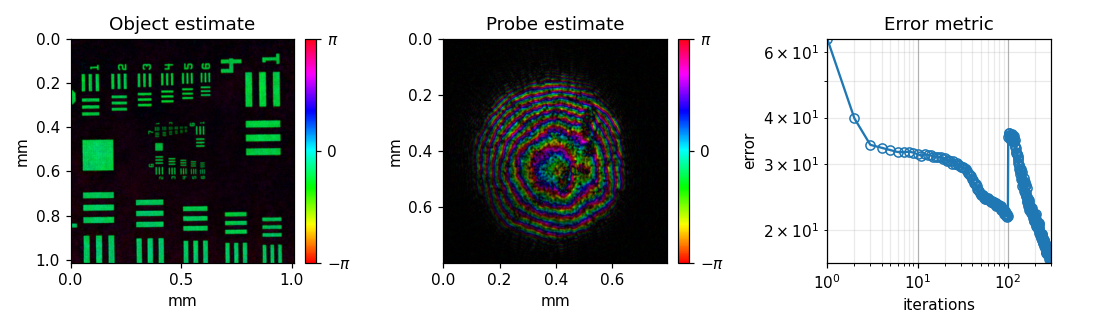

<IPython.core.display.Javascript object>


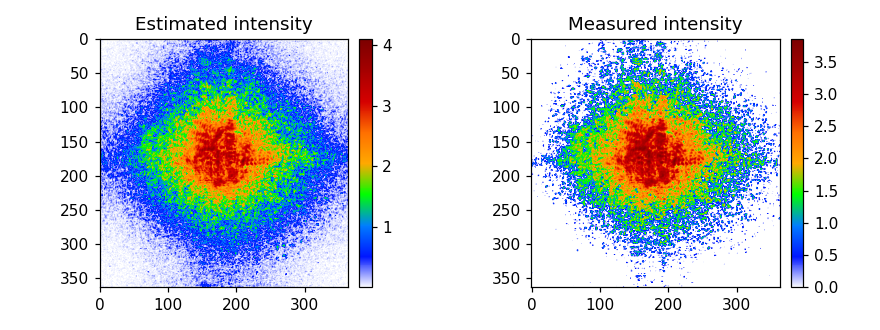

                                                                                                                       
iteration: 0                                                                                                           
error: 35.4                                                                                                            
estimated linear overlap: 74.7 %                                                                                       
estimated area overlap: 74.8 %                                                                                         
                                                                                                                       
iteration: 1                                                                                                           
error: 36.4                                                                                                            
estimated linear overlap: 75.3 %        

estimated linear overlap: 75.9 %                                                                                       
estimated area overlap: 75.7 %                                                                                         
                                                                                                                       
iteration: 14                                                                                                          
error: 35.3                                                                                                            
estimated linear overlap: 75.8 %                                                                                       
estimated area overlap: 74.7 %                                                                                         
                                                                                                                       
iteration: 15                           

iteration: 27                                                                                                          
error: 31.1                                                                                                            
estimated linear overlap: 75.1 %                                                                                       
estimated area overlap: 75.6 %                                                                                         
                                                                                                                       
iteration: 28                                                                                                          
error: 31.6                                                                                                            
estimated linear overlap: 75.1 %                                                                                       
estimated area overlap: 75.7 %          

estimated area overlap: 75.2 %                                                                                         
                                                                                                                       
iteration: 41                                                                                                          
error: 27.2                                                                                                            
estimated linear overlap: 74.8 %                                                                                       
estimated area overlap: 74.6 %                                                                                         
                                                                                                                       
iteration: 42                                                                                                          
error: 28.6                             

error: 26.8                                                                                                            
estimated linear overlap: 74.6 %                                                                                       
estimated area overlap: 75.4 %                                                                                         
                                                                                                                       
iteration: 55                                                                                                          
error: 25.2                                                                                                            
estimated linear overlap: 74.6 %                                                                                       
estimated area overlap: 74.6 %                                                                                         
                                        

                                                                                                                       
iteration: 68                                                                                                          
error: 23.1                                                                                                            
estimated linear overlap: 74.2 %                                                                                       
estimated area overlap: 74.7 %                                                                                         
                                                                                                                       
iteration: 69                                                                                                          
error: 24.0                                                                                                            
estimated linear overlap: 74.3 %        

estimated linear overlap: 74.4 %                                                                                       
estimated area overlap: 74.3 %                                                                                         
                                                                                                                       
iteration: 82                                                                                                          
error: 22.9                                                                                                            
estimated linear overlap: 74.4 %                                                                                       
estimated area overlap: 74.5 %                                                                                         
                                                                                                                       
iteration: 83                           

iteration: 95                                                                                                          
error: 21.1                                                                                                            
estimated linear overlap: 74.1 %                                                                                       
estimated area overlap: 74.3 %                                                                                         
                                                                                                                       
iteration: 96                                                                                                          
error: 21.1                                                                                                            
estimated linear overlap: 74.2 %                                                                                       
estimated area overlap: 74.6 %          

estimated area overlap: 74.3 %                                                                                         
                                                                                                                       
iteration: 109                                                                                                         
error: 21.1                                                                                                            
estimated linear overlap: 74.1 %                                                                                       
estimated area overlap: 74.1 %                                                                                         
                                                                                                                       
iteration: 110                                                                                                         
error: 20.4                             

error: 20.1                                                                                                            
estimated linear overlap: 74.1 %                                                                                       
estimated area overlap: 74.9 %                                                                                         
                                                                                                                       
iteration: 123                                                                                                         
error: 19.6                                                                                                            
estimated linear overlap: 74.0 %                                                                                       
estimated area overlap: 75.2 %                                                                                         
                                        

                                                                                                                       
iteration: 136                                                                                                         
error: 18.8                                                                                                            
estimated linear overlap: 74.2 %                                                                                       
estimated area overlap: 75.3 %                                                                                         
                                                                                                                       
iteration: 137                                                                                                         
error: 19.6                                                                                                            
estimated linear overlap: 74.1 %        

estimated linear overlap: 73.9 %                                                                                       
estimated area overlap: 75.3 %                                                                                         
                                                                                                                       
iteration: 150                                                                                                         
error: 18.1                                                                                                            
estimated linear overlap: 74.0 %                                                                                       
estimated area overlap: 75.2 %                                                                                         
                                                                                                                       
iteration: 151                          

iteration: 163                                                                                                         
error: 17.5                                                                                                            
estimated linear overlap: 73.9 %                                                                                       
estimated area overlap: 75.3 %                                                                                         
                                                                                                                       
iteration: 164                                                                                                         
error: 17.6                                                                                                            
estimated linear overlap: 73.8 %                                                                                       
estimated area overlap: 75.4 %          

estimated area overlap: 75.1 %                                                                                         
                                                                                                                       
iteration: 177                                                                                                         
error: 17.6                                                                                                            
estimated linear overlap: 74.0 %                                                                                       
estimated area overlap: 75.2 %                                                                                         
                                                                                                                       
iteration: 178                                                                                                         
error: 17.4                             

error: 16.7                                                                                                            
estimated linear overlap: 73.8 %                                                                                       
estimated area overlap: 75.3 %                                                                                         
                                                                                                                       
iteration: 191                                                                                                         
error: 16.7                                                                                                            
estimated linear overlap: 74.0 %                                                                                       
estimated area overlap: 75.7 %                                                                                         
                                        

In [11]:
# We still use the same engine mPIE
mPIE.numIterations = 200   # number of iterations
mPIE.betaProbe = 0.25   # update stepsize for the probe [0,1]
mPIE.betaObject = 0.25   # update stepsize for the object [0,1]
mPIE.reconstruct()    # do reconstruction

In [12]:
## now save the data
reconstruction.saveResults('reconstruction.hdf5')